In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('tcas.csv')

C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (23,24,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(36401, 79)

In [4]:
df.dtypes

AcademicYear          int64
AcademicSemester      int64
PrefixName           object
Sex                  object
FacultyID             int64
                     ...   
Q39                 float64
Q40                 float64
Q41                 float64
Q42                 float64
Status               object
Length: 79, dtype: object

In [5]:
df.isnull().sum()

AcademicYear            0
AcademicSemester        0
PrefixName              0
Sex                     0
FacultyID               0
                    ...  
Q39                 17284
Q40                 17284
Q41                 17284
Q42                 17284
Status                  0
Length: 79, dtype: int64

In [6]:
df.AcademicYear.unique()

array([2562, 2563], dtype=int64)

In [7]:
df.StudentType=='FOREIGN'

0         True
1         True
2         True
3         True
4         True
         ...  
36396    False
36397    False
36398    False
36399    False
36400    False
Name: StudentType, Length: 36401, dtype: bool

In [8]:
fore_stu = df[df["StudentType"] == "FOREIGN"]

In [9]:
fore_stu.isnull().sum(axis=1)

0        48
1        48
2        49
3        49
4        50
         ..
34525    54
34526    54
34527    55
34528    55
34529    55
Length: 300, dtype: int64

In [10]:
# for Thai student
threshold = 50 
df.index[(df.isnull().sum(axis=1)/len(df.columns)*100) >= threshold]
df.iloc[df.index[(df.isnull().sum(axis=1)/len(df.columns)*100) >= threshold]]

,AcademicYear,AcademicSemester,PrefixName,Sex,FacultyID,FacultyName,DepartmentCode,DepartmentName,MajorName,EntryTypeID,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
0,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
1,2562,1,MR.,Male,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
2,2562,1,MR.,Male,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
3,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
4,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36031,2563,1,MISS,Female,22,School of Dentistry,2201,Dentistry,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not MFU student
36066,2563,1,MR.,Male,22,School of Dentistry,2201,Dentistry,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not MFU student
36263,2563,1,MR.,Male,22,School of Dentistry,2201,Dentistry,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not MFU student
36330,2563,1,MR.,Male,18,School of Health Science,1806,Sports and Health Science,NaN,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not MFU student


In [11]:
threshold =50
df = df[df.columns[(df.isnull().sum()/len(df)*100) <= threshold]]
df = df.iloc[df.index[(df.isnull().sum(axis=1)/len(df.columns)*100) <= threshold]]
df.reset_index(drop=True, inplace=True)

In [12]:
df=df.drop(columns=['AcademicSemester'])
df=df.drop(columns=['LevelID'])
df=df.drop(columns=['LevelName'])
df=df.drop(columns=['LevelNameEng'])

In [13]:
cat_data_ = df.select_dtypes(include=['object'])
cat_data_.shape

(19117, 14)

In [14]:
num_data_ = df.select_dtypes(include=['number'])
num_data_.shape

(19117, 54)

In [15]:
df[['GPAX']].isnull().sum()

GPAX    178
dtype: int64

In [16]:
df[['GPAX']]= df.GPAX.fillna(0)
df[['GPAX']].shape

(19117, 1)

C:\Users\LENOVO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3650 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3605 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3592 missing from c

C:\Users\LENOVO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3597 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3595 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 3597 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\LENOVO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 3595 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\LENOVO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3630 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 3630 missing from curre

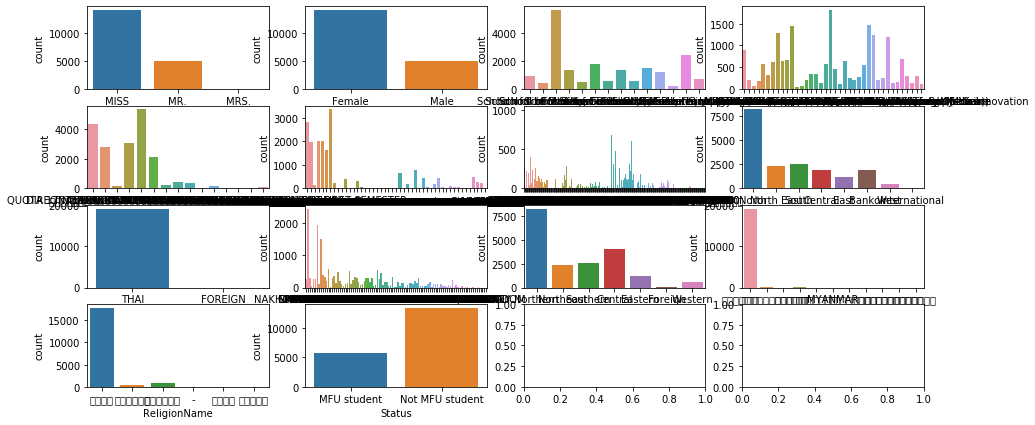

In [17]:
# Separate categorial features
cat_data_ = df.select_dtypes(include=['object']) 

# Create count plots for all nominal features
fig, ax = plt.subplots(4, 4, figsize=(15, 7))
for i, subplot in zip(cat_data_.columns, ax.flatten()):
    sns.countplot(cat_data_[i], ax=subplot)

In [18]:
df.loc[df.PrefixName =='MRS.', 'PrefixName'] = 'MISS'

[Text(0, 0, 'MISS'), Text(0, 0, 'MR.'), Text(0, 0, 'MRS.')]

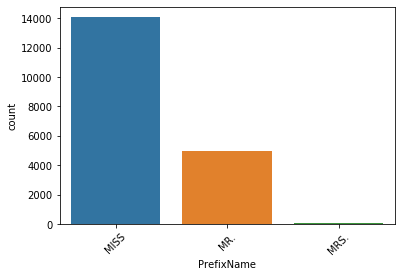

In [19]:
chart = sns.countplot(cat_data_.PrefixName)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

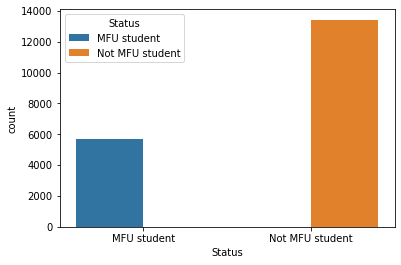

In [20]:
sns.countplot(data=cat_data_, x='Status', hue=df.Status)

In [21]:
df.head()

,AcademicYear,PrefixName,Sex,FacultyID,FacultyName,DepartmentCode,DepartmentName,EntryTypeID,EntryTypeName,EntryGroupID,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
0,2562,MISS,Female,10,School of Liberal Arts,1006,English,10,QUOTA 17 NORTHERN PROVINCES,623020,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MFU student
1,2562,MR.,Male,10,School of Liberal Arts,1006,English,10,QUOTA 17 NORTHERN PROVINCES,623020,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,MFU student
2,2562,MISS,Female,10,School of Liberal Arts,1006,English,29,DIRECT ADMISSION BY SCHOOL,623011,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,MFU student
3,2562,MISS,Female,10,School of Liberal Arts,1006,English,29,DIRECT ADMISSION BY SCHOOL,623011,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,MFU student
4,2562,MISS,Female,10,School of Liberal Arts,1006,English,10,QUOTA 17 NORTHERN PROVINCES,623020,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,MFU student


In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.isnull().sum(axis=1)/len(df.columns)*100

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
19112    0.0
19113    0.0
19114    0.0
19115    0.0
19116    0.0
Length: 19117, dtype: float64

In [24]:
df.TCAS.unique()

array([2, 1, 5], dtype=int64)

In [25]:
df.PrefixName.unique()

array(['MISS', 'MR.'], dtype=object)

In [26]:
df.EntryTypeName.unique()

array(['QUOTA 17 NORTHERN PROVINCES', 'DIRECT ADMISSION BY SCHOOL',
       'INTERNATIONAL SCHOOL', 'DIRECT ADMISSION', 'QUOTA BY SCHOOL',
       'SPECIAL FOR GOOD STUDENT', 'GOOD BEHAVE STUDENTS',
       'SPECIAL TALENT', 'RE-ID FIRST SEMESTER GPAX 2.00',
       'CHIANG RAI DEVELOPMENT SCHOLARSHIP', 'EP-MEP PROGRAM',
       'DISABLE STUDENT',
       'DIRECT ADMISSION UNDER CONDITION GPAX 2.00 FIRST SEMESTER',
       'QUOTA BY COMMUNITY HOSPITAL', 'QUOTA FOR SOUTHERN BORDER'],
      dtype=object)

In [27]:
df.Status.value_counts()

Not MFU student    13424
MFU student         5693
Name: Status, dtype: int64

In [28]:
cat_data_.dtypes

PrefixName             object
Sex                    object
FacultyName            object
DepartmentName         object
EntryTypeName          object
EntryGroupName         object
ApplicationDate        object
HomeRegion             object
StudentType            object
ProvinceNameEng        object
SchoolRegionNameEng    object
NationName             object
ReligionName           object
Status                 object
dtype: object

In [29]:
num_data_.dtypes

AcademicYear        int64
FacultyID           int64
DepartmentCode      int64
EntryTypeID         int64
EntryGroupID        int64
TCAS                int64
StudentTH           int64
GPAX              float64
GPA_Eng           float64
GPA_Math          float64
GPA_Sci           float64
GPA_Sco           float64
Q1                float64
Q2                float64
Q3                float64
Q4                float64
Q5                float64
Q6                float64
Q7                float64
Q8                float64
Q9                float64
Q10               float64
Q11               float64
Q12               float64
Q13               float64
Q14               float64
Q15               float64
Q16               float64
Q17               float64
Q18               float64
Q19               float64
Q20               float64
Q21               float64
Q22               float64
Q23               float64
Q24               float64
Q25               float64
Q26               float64
Q27         

In [30]:
#num_data_[['GPAX']]= num_data_.GPAX.dropna()

In [31]:
#num_data_[['GPAX']]= num_data_.GPAX.fillna(num_data_.GPAX.mean())

In [32]:
cat_data = df[['PrefixName','Sex','FacultyName','DepartmentName','EntryTypeName','ApplicationDate','HomeRegion','StudentType','ProvinceNameEng','SchoolRegionNameEng','NationName','ReligionName']]
num_data = num_data_
class_target = df[['Status']]

In [33]:
nominal_data = cat_data['EntryTypeName']
nominal_data = pd.get_dummies(nominal_data)
nominal_data

,CHIANG RAI DEVELOPMENT SCHOLARSHIP,DIRECT ADMISSION,DIRECT ADMISSION BY SCHOOL,DIRECT ADMISSION UNDER CONDITION GPAX 2.00 FIRST SEMESTER,DISABLE STUDENT,EP-MEP PROGRAM,GOOD BEHAVE STUDENTS,INTERNATIONAL SCHOOL,QUOTA 17 NORTHERN PROVINCES,QUOTA BY COMMUNITY HOSPITAL,QUOTA BY SCHOOL,QUOTA FOR SOUTHERN BORDER,RE-ID FIRST SEMESTER GPAX 2.00,SPECIAL FOR GOOD STUDENT,SPECIAL TALENT
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19112,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
19113,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
19114,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
19115,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
Quesionaire = df[['Q1','Q2','Q3','Q4','Q5','Q6','Q23','Q24','Q25','Q26','Q27','Q28','Q29','Q30','Q31','Q32','Q33','Q34','Q35','Q36']]

In [35]:
Gpax = df[['GPAX']]

In [36]:
transform_num_data = pd.concat([Gpax,nominal_data,Quesionaire,class_target], axis=1)
transform_num_data.head()

,GPAX,CHIANG RAI DEVELOPMENT SCHOLARSHIP,DIRECT ADMISSION,DIRECT ADMISSION BY SCHOOL,DIRECT ADMISSION UNDER CONDITION GPAX 2.00 FIRST SEMESTER,DISABLE STUDENT,EP-MEP PROGRAM,GOOD BEHAVE STUDENTS,INTERNATIONAL SCHOOL,QUOTA 17 NORTHERN PROVINCES,...,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Status
0,3.61,0,0,0,0,0,0,0,0,1,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,MFU student
1,3.04,0,0,0,0,0,0,0,0,1,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,MFU student
2,3.92,0,0,1,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,MFU student
3,3.46,0,0,1,0,0,0,0,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,MFU student
4,3.40,0,0,0,0,0,0,0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,MFU student


In [37]:
X = transform_num_data.iloc[:,0:36] 
X

,GPAX,CHIANG RAI DEVELOPMENT SCHOLARSHIP,DIRECT ADMISSION,DIRECT ADMISSION BY SCHOOL,DIRECT ADMISSION UNDER CONDITION GPAX 2.00 FIRST SEMESTER,DISABLE STUDENT,EP-MEP PROGRAM,GOOD BEHAVE STUDENTS,INTERNATIONAL SCHOOL,QUOTA 17 NORTHERN PROVINCES,...,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36
0,3.61,0,0,0,0,0,0,0,0,1,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,3.04,0,0,0,0,0,0,0,0,1,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3.92,0,0,1,0,0,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.46,0,0,1,0,0,0,0,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
4,3.40,0,0,0,0,0,0,0,0,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19112,2.68,0,0,1,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
19113,2.90,0,0,1,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
19114,2.64,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19115,2.96,0,0,1,0,0,0,0,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [38]:
Y = transform_num_data.iloc[:,-1] 
Y

0            MFU student
1            MFU student
2            MFU student
3            MFU student
4            MFU student
              ...       
19112    Not MFU student
19113    Not MFU student
19114    Not MFU student
19115    Not MFU student
19116    Not MFU student
Name: Status, Length: 19117, dtype: object

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
X

array([[ 0.71538111, -0.02287725, -0.43815699, ...,  0.39197182,
        -0.32761743, -0.19394324],
       [-0.31662052, -0.02287725, -0.43815699, ...,  0.39197182,
        -0.32761743, -0.19394324],
       [ 1.27664516, -0.02287725, -0.43815699, ...,  0.39197182,
        -0.32761743, -0.19394324],
       ...,
       [-1.04083218, -0.02287725, -0.43815699, ...,  0.39197182,
        -0.32761743, -0.19394324],
       [-0.46146285, -0.02287725, -0.43815699, ...,  0.39197182,
        -0.32761743, -0.19394324],
       [ 0.93264461, -0.02287725, -0.43815699, ..., -2.55120383,
         3.05234067, -0.19394324]])

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean')

# Fit the model to the whole dataset
knn.fit(X, Y)

# Predict classes of training set
y_pred = knn.predict(X)

# Evaluate model performace
ac = metrics.accuracy_score(Y, y_pred)
print('Training Accuracy: ', ac)
print('Training Classification Error: ', 1-ac)
print('Confusion matrix:')
print(metrics.confusion_matrix(Y, y_pred))

Training Accuracy:  0.8181199979076215
Training Classification Error:  0.18188000209237853
Confusion matrix:
[[5687    6]
 [3471 9953]]


In [41]:
# Import module from sklean to split data onto training and test sets
from sklearn.model_selection import train_test_split

# Split training set and test set with ration 80% : 20% by specify test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y)#, random_state = 0)

# print the shape of trainning and test sets
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (15293, 36)
y_train shape:  (15293,)
x_test shape:  (3824, 36)
y_test shape:  (3824,)


In [42]:
Y.value_counts()

Not MFU student    13424
MFU student         5693
Name: Status, dtype: int64

In [43]:
y_train.value_counts()

Not MFU student    10739
MFU student         4554
Name: Status, dtype: int64

In [44]:
y_test.value_counts()

Not MFU student    2685
MFU student        1139
Name: Status, dtype: int64

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 2
knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean')

# Fit the model to the training set
knn.fit(x_train, y_train)

# Predict classes of the test set
y_pred = knn.predict(x_test)

# Evaluate model performace
ac = metrics.accuracy_score(y_test, y_pred)
print('Tesing Accuracy: ', ac)
print('Tesing Classification Error: ', 1-ac)
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred))

Tesing Accuracy:  0.5975418410041841
Tesing Classification Error:  0.40245815899581594
Confusion matrix:
[[ 727  412]
 [1127 1558]]


In [46]:
#Step 1: Import the sklearn classes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=2 
knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean') 

#Step 3: Fit and test the model with cross validation (10-fold)
cv_results = cross_validate(knn, X,Y, cv=10, return_train_score=True)
cv_results

{'fit_time': array([0.63163757, 0.71678162, 0.69492221, 0.60037136, 0.67886329,
        0.65848422, 0.67333364, 0.67917681, 0.59247136, 0.77682424]),
 'score_time': array([1.08093524, 1.14003468, 1.05751562, 1.17866755, 0.9663291 ,
        1.01514244, 1.0753901 , 1.01645446, 1.06349158, 1.25533485]),
 'test_score': array([0.56276151, 0.63023013, 0.32531381, 0.666841  , 0.45345188,
        0.55334728, 0.65324268, 0.40031397, 0.53846154, 0.55102041]),
 'train_score': array([0.81859924, 0.81482127, 0.83045626, 0.81394943, 0.82214473,
        0.81807614, 0.8128451 , 0.82790887, 0.82465419, 0.82134139])}

In [47]:
# Accuracy score for each fold 
print('Tesing Accuracy for each fold:', cv_results['test_score'])

# Overall accuracy score for cross validaiton 
print('Cross Validation Accuracy: %.3f +/- %.3f' % (cv_results['test_score'].mean(), cv_results['test_score'].std()))

Tesing Accuracy for each fold: [0.56276151 0.63023013 0.32531381 0.666841   0.45345188 0.55334728
 0.65324268 0.40031397 0.53846154 0.55102041]
Cross Validation Accuracy: 0.533 +/- 0.105


In [48]:
# Experimenting with different k values
from sklearn import metrics
k_range = list(range(1,30))
scores_cv = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv_results = cross_validate(knn, X,Y, cv=10) # compute CV accuracy
    scores_cv.append(cv_results['test_score'].mean())
    print(k, cv_results['test_score'].mean())

1 0.5910404747673128
2 0.5334984202886175
3 0.6127470556938579
4 0.5785874938968185
5 0.6205403258825256
6 0.6003473613455681
7 0.6259276288564992
8 0.6087681918599432
9 0.629013567126239
10 0.6161440646422713
11 0.6318896161618816
12 0.6219496955525049
13 0.6331447368132963
14 0.6229950364439307
15 0.6352364859687035
16 0.6279647230633483
17 0.6371199058960565
18 0.6300045541229043
19 0.6372770012414365
20 0.6306326070820989
21 0.6380089998664416
22 0.6337709560811773
23 0.6407293219830578
24 0.6340330918334505
25 0.6409384996354512
26 0.6341891471748016
27 0.6398919545288344
28 0.633561477374986
29 0.6402050231099843


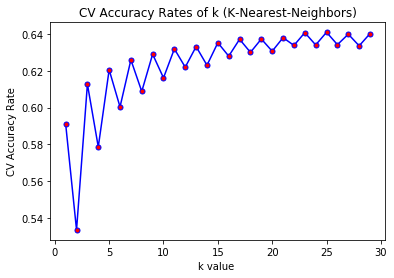

In [49]:
# create a line graph for testing accuracy
import matplotlib.pyplot as plt
plt.plot(k_range, scores_cv, 'y', color='blue',marker='o', markerfacecolor='red', markersize='5')
plt.xlabel('k value ')
plt.ylabel('CV Accuracy Rate')
plt.title('CV Accuracy Rates of k (K-Nearest-Neighbors)')
plt.show()

In [50]:
# find best k with the highest cv accuracy
import operator
index, value = max(enumerate(scores_cv), key=operator.itemgetter(1))
print('best k = ', index, 'accuracy = ', value)

best k =  24 accuracy =  0.6409384996354512


In [51]:
#Step 1: Import the sklearn class
from sklearn.neighbors import KNeighborsClassifier

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=25(best k) 
best_knn = KNeighborsClassifier(n_neighbors=25, metric = 'euclidean') 

#Step 3: Fit the model with data (model training)
#Model is learning the relationship between data (X) and class(Y)
best_knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [52]:
import pickle
pickle.dump(best_knn, open('best_knn.pkl', 'wb'))
pickle.dump(sc, open('normalization.pkl', 'wb'))

In [53]:
# transform_num_data.to_csv('transform_num_data-new.csv')

In [75]:
X_new = pd.read_csv('test.csv')

In [76]:
X_new.head()

,GPAX,EntryTypeName,Q1,Q2,Q3,Q4,Q5,Q6,Q23,Q24,...,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36
0,3.61,QUOTA 17 NORTHERN PROVINCES,1,1,1,1,1,1,0,0,...,0,0,1,1,0,0,1,1,0,0
1,3.92,DIRECT ADMISSION BY SCHOOL,1,1,1,1,1,1,0,0,...,0,0,1,1,0,0,0,1,0,0
2,3.60,DIRECT ADMISSION,1,1,0,0,1,1,0,0,...,1,0,1,1,0,0,1,1,0,0
3,3.23,SPECIAL FOR GOOD STUDENT,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,2.90,QUOTA BY SCHOOL,1,1,1,0,0,0,0,0,...,0,1,1,1,0,1,0,1,0,0


In [78]:
# One-hot encoding for nominal features
cat_data = pd.get_dummies(X_new[['EntryTypeName']])
cat_data

,EntryTypeName_DIRECT ADMISSION,EntryTypeName_DIRECT ADMISSION BY SCHOOL,EntryTypeName_QUOTA 17 NORTHERN PROVINCES,EntryTypeName_QUOTA BY SCHOOL,EntryTypeName_SPECIAL FOR GOOD STUDENT,EntryTypeName_SPECIAL TALENT
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0
5,0,0,0,0,0,1
6,0,1,0,0,0,0
7,0,0,1,0,0,0
8,0,0,0,0,1,0
9,0,0,0,1,0,0


In [79]:
X_new = pd.concat([cat_data, X_new], axis=1)
X_new

,EntryTypeName_DIRECT ADMISSION,EntryTypeName_DIRECT ADMISSION BY SCHOOL,EntryTypeName_QUOTA 17 NORTHERN PROVINCES,EntryTypeName_QUOTA BY SCHOOL,EntryTypeName_SPECIAL FOR GOOD STUDENT,EntryTypeName_SPECIAL TALENT,GPAX,EntryTypeName,Q1,Q2,...,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36
0,0,0,1,0,0,0,3.61,QUOTA 17 NORTHERN PROVINCES,1,1,...,0,0,1,1,0,0,1,1,0,0
1,0,1,0,0,0,0,3.92,DIRECT ADMISSION BY SCHOOL,1,1,...,0,0,1,1,0,0,0,1,0,0
2,1,0,0,0,0,0,3.60,DIRECT ADMISSION,1,1,...,1,0,1,1,0,0,1,1,0,0
3,0,0,0,0,1,0,3.23,SPECIAL FOR GOOD STUDENT,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,2.90,QUOTA BY SCHOOL,1,1,...,0,1,1,1,0,1,0,1,0,0
5,0,0,0,0,0,1,3.16,SPECIAL TALENT,0,1,...,1,0,1,1,1,0,0,1,0,0
6,0,1,0,0,0,0,3.19,DIRECT ADMISSION BY SCHOOL,1,1,...,1,0,0,1,1,1,1,1,0,0
7,0,0,1,0,0,0,2.50,QUOTA 17 NORTHERN PROVINCES,0,1,...,0,0,1,0,0,0,1,1,0,0
8,0,0,0,0,1,0,2.44,SPECIAL FOR GOOD STUDENT,0,0,...,1,0,1,0,1,0,0,1,0,0
9,0,0,0,1,0,0,3.58,QUOTA BY SCHOOL,1,1,...,0,0,1,0,0,0,0,1,0,0


In [80]:
#Drop un-used feature
X_new = X_new.drop(columns=['EntryTypeName'])
X_new

,EntryTypeName_DIRECT ADMISSION,EntryTypeName_DIRECT ADMISSION BY SCHOOL,EntryTypeName_QUOTA 17 NORTHERN PROVINCES,EntryTypeName_QUOTA BY SCHOOL,EntryTypeName_SPECIAL FOR GOOD STUDENT,EntryTypeName_SPECIAL TALENT,GPAX,Q1,Q2,Q3,...,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36
0,0,0,1,0,0,0,3.61,1,1,1,...,0,0,1,1,0,0,1,1,0,0
1,0,1,0,0,0,0,3.92,1,1,1,...,0,0,1,1,0,0,0,1,0,0
2,1,0,0,0,0,0,3.60,1,1,0,...,1,0,1,1,0,0,1,1,0,0
3,0,0,0,0,1,0,3.23,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,2.90,1,1,1,...,0,1,1,1,0,1,0,1,0,0
5,0,0,0,0,0,1,3.16,0,1,1,...,1,0,1,1,1,0,0,1,0,0
6,0,1,0,0,0,0,3.19,1,1,1,...,1,0,0,1,1,1,1,1,0,0
7,0,0,1,0,0,0,2.50,0,1,0,...,0,0,1,0,0,0,1,1,0,0
8,0,0,0,0,1,0,2.44,0,0,1,...,1,0,1,0,1,0,0,1,0,0
9,0,0,0,1,0,0,3.58,1,1,0,...,0,0,1,0,0,0,0,1,0,0


In [81]:
X_new = sc.transform(X_new) # (2) normalize them using the normalization model created previously (sc is StandardScaler)
prediction = best_knn.predict(X_new) # (3) predict their class lables

ValueError: operands could not be broadcast together with shapes (10,27) (36,) (10,27) 

In [74]:
prediction 

array(['Not MFU student', 'Not MFU student', 'Not MFU student',
       'Not MFU student', 'Not MFU student', 'Not MFU student',
       'Not MFU student', 'Not MFU student', 'Not MFU student',
       'Not MFU student', 'Not MFU student', 'MFU student', 'MFU student',
       'Not MFU student', 'MFU student', 'Not MFU student',
       'Not MFU student', 'Not MFU student', 'Not MFU student',
       'Not MFU student'], dtype=object)

In [63]:
# # Predict the class label for new record(s)
# X_new = sc.transform(X_new)  # (1) define/read 2 new instances
# best_knn.predict(X_new) # (3) predict their class lables

ValueError: operands could not be broadcast together with shapes (10,27) (36,) (10,27) 